# Max-Cut (10,000 Vertices) on Dynex n.quantum computing cloud

In [1]:
import dynex
import networkx as nx
import matplotlib
from matplotlib import pyplot as plt
from collections import defaultdict

## Simple Max-Cut graph

In [5]:
# Create empty graph
G = nx.Graph()

In [6]:
# Add edges to the graph (also adds nodes)
G.add_edges_from([(1,2),(1,3),(2,4),(3,4),(3,5),(4,5)])

In [9]:
# ------- Set up our QUBO dictionary -------

# Initialize our Q matrix
Q = defaultdict(int)

# Update Q matrix for every edge in the graph
for i, j in G.edges:
    Q[(i,i)]+= -1
    Q[(j,j)]+= -1
    Q[(i,j)]+= 2

In [17]:
# Sample on Dynex
sampleset = dynex.sample_qubo(Q, 0.0, mainnet=False, description='Dynex SDK job', num_reads=50000, annealing_time = 200, debugging=True);
print('Result:')
print(sampleset)

[DYNEX] PRECISION SET TO 0.0001
[DYNEX] SAMPLER INITIALISED
Dynex (testnet) branch-and-bound Ising/Qubo sampler
---------------------------------------------------
c first lower bound: 70000
o 70000
c 1 branches 12 propagates
c ** dynex-testnet-bnb time = 0.000133000000 seconds

c solution file written: /root/dynex/dynexcloud/tmp/b67dfd84fb4282de20781ab41489f5fd.dnx.1000000.1000000.-1.70000
╭────────────┬─────────────┬───────────┬───────────────────────────┬─────────┬─────────┬────────────────╮
│   DYNEXJOB │   BLOCK FEE │ ELAPSED   │ WORKERS READ              │ CHIPS   │ STEPS   │ GROUND STATE   │
├────────────┼─────────────┼───────────┼───────────────────────────┼─────────┼─────────┼────────────────┤
│         -1 │           0 │           │ *** WAITING FOR READS *** │         │         │                │
╰────────────┴─────────────┴───────────┴───────────────────────────┴─────────┴─────────┴────────────────╯

[DYNEX] FINISHED READ AFTER 0.00 SECONDS
[DYNEX] SAMPLESET READY
Result:
  

Maxcut result: 5


/tmp/ipykernel_1434920/591714125.py:17: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style='solid', width=3)


{1: Text(-0.6584219450731676, -0.5546281579337784, '1'),
 2: Text(-0.801115786721148, 0.31126312712251003, '2'),
 3: Text(0.29827486278183307, -0.3631900170796597, '3'),
 4: Text(0.16126286901248335, 0.43911207651906525, '4'),
 5: Text(1.0, 0.16744297137186198, '5')}

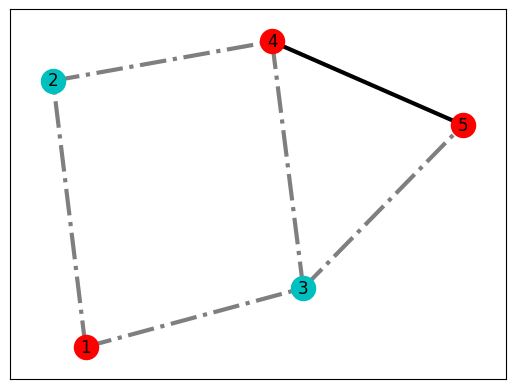

In [21]:
# Grab best result
lut = sampleset.first.sample

# Interpret best result in terms of nodes and edges
S0 = [node for node in G.nodes if not lut[node]]
S1 = [node for node in G.nodes if lut[node]]
cut_edges = [(u, v) for u, v in G.edges if lut[u]!=lut[v]]
uncut_edges = [(u, v) for u, v in G.edges if lut[u]==lut[v]]

print('Maxcut result:',len(cut_edges))

# Display best result
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=S0, node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=S1, node_color='c')
nx.draw_networkx_edges(G, pos, edgelist=cut_edges, style='dashdot', alpha=0.5, width=3)
nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style='solid', width=3)
nx.draw_networkx_labels(G, pos)

## 10,000 Vertices

In [112]:
import numpy as np

In [113]:
filename = 'G70.dat' 

In [114]:
f = open(filename, "r").readlines()

In [115]:
b_matrix=False
bin_size = f[0].split(" ")[0]
Q = np.zeros([int(bin_size) + 1, int(bin_size) + 1])
init_bin = np.zeros([int(bin_size) + 1])
init_bin[-1] = 1
for ele in f[1:]:
    i, j, v = ele.split()
    if b_matrix == True :
        Q[int(i) - 1, int(j) - 1] += int(v)
        if (int(i) != int(j)):
            Q[int(j) - 1, int(i) - 1] += int(v)
    else :
        if (int(i) == int(j)) :
            print('No edge connected at the same Node',int(i),int(j))
        else :
            Q[int(i), int(j)] += int(v)
            Q[int(j), int(i)] += int(v)
            Q[int(i), int(i)] += -int(v)
            Q[int(j), int(j)] += -int(v)

In [117]:
# Sample on Dynex
sampleset = dynex.sample_qubo(Q, 0.0, mainnet=True, num_reads=100000, annealing_time = 10000, alpha=0.05, beta=0.2);
print('Result:')
print(sampleset)

╭────────────┬─────────────┬───────────┬────────────────┬─────────┬─────────┬────────────────╮
│   DYNEXJOB │   BLOCK FEE │   ELAPSED │   WORKERS READ │   CHIPS │   STEPS │   GROUND STATE │
├────────────┼─────────────┼───────────┼────────────────┼─────────┼─────────┼────────────────┤
│       7305 │        6.59 │     10.99 │              7 │  112064 │   10000 │   107140000.00 │
╰────────────┴─────────────┴───────────┴────────────────┴─────────┴─────────┴────────────────╯
╭────────────┬─────────────────┬─────────┬───────┬──────────────┬─────────────────┬─────────────────────────────┬───────────────┬──────────╮
│     WORKER │         VERSION │   CHIPS │   LOC │       ENERGY │         RUNTIME │                 LAST UPDATE │         STEPS │   STATUS │
├────────────┼─────────────────┼─────────┼───────┼──────────────┼─────────────────┼─────────────────────────────┼───────────────┼──────────┤
│ 88fb..fa04 │ 2.3.5f.BZM.v21. │     768 │ 18653 │         0.00 │    8.970541596s │ 2024-04-29T09:30:3